In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [7]:
def detect_salt_pepper(image_path, edge_threshold=0.23, diff_threshold=67):

        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

        if image is None:
                raise ValueError("Image not found or unable to load.")

        edges = cv2.Laplacian(image, cv2.CV_64F)
        edges = np.abs(edges)

        edge_pixels = np.sum(edges > 50)
        total_pixels = image.size
        edge_ratio = edge_pixels / total_pixels

        if edge_ratio > edge_threshold:
                filtered = cv2.medianBlur(image, 3)
                diff = cv2.absdiff(image, filtered)
                
                noisy_pixels = np.sum(diff > diff_threshold)
                noise_ratio = noisy_pixels / total_pixels

                
                if noise_ratio > 0.01:
                        return True
        return False


In [8]:
def remove_salt_pepper(image_path, output_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise ValueError("Image not found or unable to load.")

    vertical_blur = cv2.blur(image, (1, 7))
    
    median_blur = cv2.medianBlur(vertical_blur, 3)
    
    _, thresholded_image = cv2.threshold(median_blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    cv2.imwrite(output_path, thresholded_image)
    return output_path

In [9]:
def plot_images(image_path, processed_image):

    original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    processed_image = cv2.imread(processed_image, cv2.IMREAD_GRAYSCALE)
    
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))

    axs[0].imshow(original_image, cmap='gray')
    axs[0].set_title("Original Image")
    axs[0].axis("off")

    axs[1].imshow(processed_image, cmap='gray')
    axs[1].set_title("Processed Image")
    axs[1].axis("off")

    plt.show()


7. The image has salt and pepper noise.


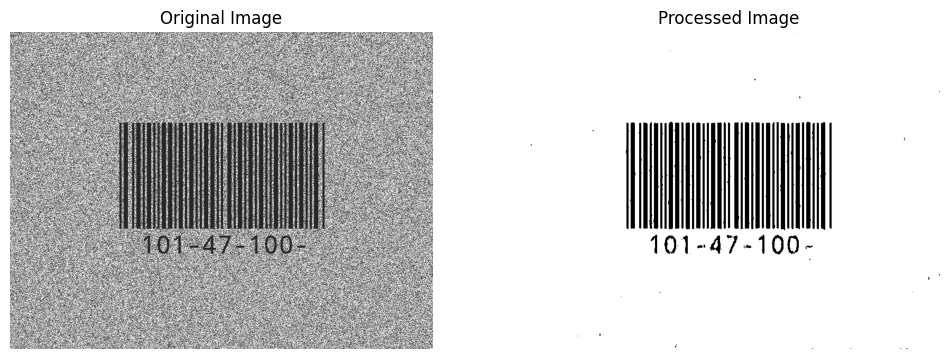

In [10]:
for i in range(1,12):
    image_path = f'Test cases\\{i}.jpg'
    if detect_salt_pepper(image_path):
        print(f"{i}. The image has salt and pepper noise.")
        output_path = remove_salt_pepper(image_path, f'Test cases\\{i}_after.jpg')
        plot_images(image_path, output_path)